In [1]:
import pandas as pd
import seaborn as sns
from  scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, cross_validate

from data_dicts_values import drop_cols
from data_prep_values import county_info_2012, county_info_2016, county_info_2018, results_info
from model_prep import lin_mod_func, run_model, make_predictions, combine_predictions
from visualizations import display_results

## Data

The demographic information was obtained from the U.S. Cencus website. The 5 year study was used in order to obtain the most accurate information for smaller countues. The results data was obtained from the MIT Election Data and Science Lab.

Note: Due to issues with demographic info for Alaska, the state of Alaska is not incorporated into our analysis. These issues will be addressed at a later time.

In [2]:
features_2012 = county_info_2012()
features_2016 = county_info_2016()
features_2018 = county_info_2018()
results_2012 = results_info(2012)
results_2016 = results_info(2016)

In [3]:
features_2016[features_2016.State == 'District of Columbia']

,County,State,Total Less than 9th grade,"Total 9th to 12th grade, no diploma",Total High school graduate,"Total Some college, no degree",Total Associate's degree,Total Bachelor's degree,Total Graduate or professional degree,Total population,...,Sex ratio (males per 100 females),Male Median age,Female Median age,Households Median income,Households Mean income,Total White,Total Black or African American,Total American Indian and Alaska Native,Total Asian,Total Hispanic or Latino
3220,"Washington city County, District of Columbia, ...",District of Columbia,18612,27898,83367,62308,14496,108252,148064,659009,...,90.3,33.6,34.0,72935,110614,266239.636,318301.347,1977.027,23724.324,69195.945


In [4]:
df_2012 = pd.merge(features_2012, results_2012, on='County')
df_2012 = df_2012.drop(columns='State_y')
df_2012 = df_2012.rename(columns={'State_x': 'State'})

In [5]:
df_2016 = pd.merge(features_2016, results_2016, on='County')
df_2016 = df_2016.drop(columns='State_y')
df_2016 = df_2016.rename(columns={'State_x': 'State'})

# EDA
The features selected break down into fice categories: education, income, sex, age, and race. 

In [6]:
selected_features = ['Median age',
                     'Sex ratio (males per 100 females)',
                     'Households Median income',
                     'Total Graduate or professional degree',
                     'Total Black or African American']

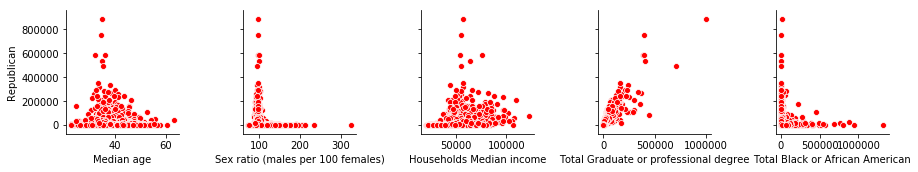

In [7]:
sns.pairplot(df_2012, x_vars=selected_features, y_vars='Republican', plot_kws={'color': 'red'});

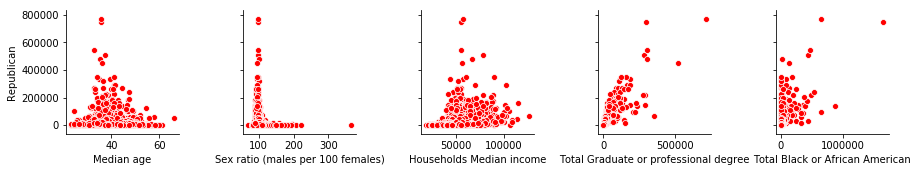

In [8]:
sns.pairplot(df_2016, x_vars=selected_features, y_vars='Republican', plot_kws={'color': 'red'});

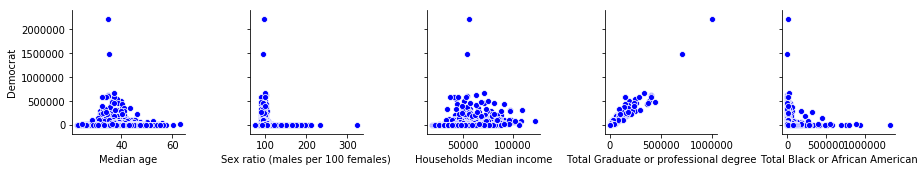

In [9]:
sns.pairplot(df_2012, x_vars=selected_features, y_vars='Democrat', plot_kws={'color': 'blue'});

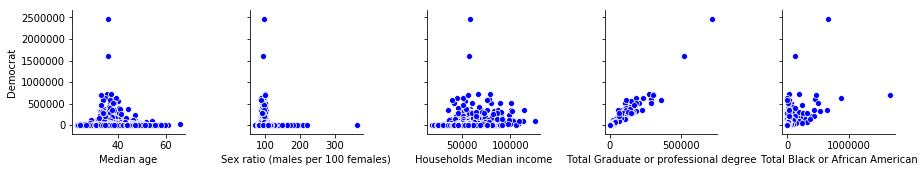

In [10]:
sns.pairplot(df_2016, x_vars=selected_features, y_vars='Democrat', plot_kws={'color': 'blue'});

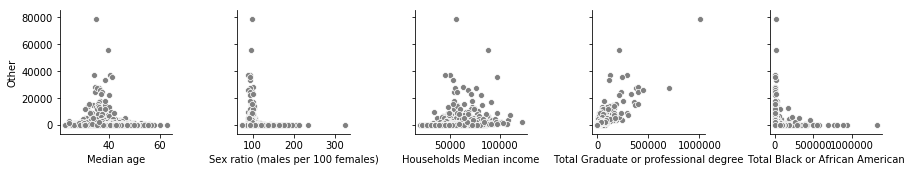

In [11]:
sns.pairplot(df_2012, x_vars=selected_features, y_vars='Other', plot_kws={'color': 'gray'});

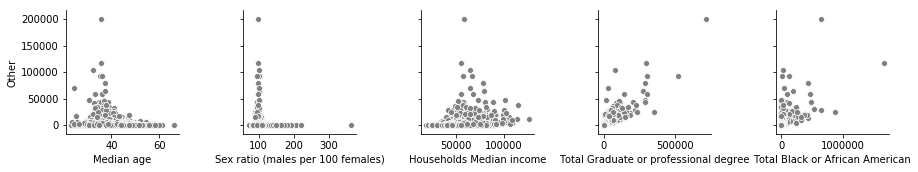

In [12]:
sns.pairplot(df_2016, x_vars=selected_features, y_vars='Other', plot_kws={'color': 'gray'});

## Methodology

The chosen target is the percentage of people who vote for a political party in each county. Republican, Democrat, and Other were chosen as our political parties. Once the percentage of votes obtained is determined, the result is then multiplied by the total population of the county in order to determine the total number of votes each party receives in each county. For maximum interpretability, a linear regression model was used.

In [13]:
X_train = df_2012.drop(columns=drop_cols)
X_test = df_2016.drop(columns=drop_cols)

#test = ['Total White', 'Total Black or African American', 'Total Asian']

# X_train = df_2012[test]
# X_test = df_2016[test]

y_train_R = df_2012['Republican']
y_train_D = df_2012['Democrat']
y_train_O = df_2012['Other']

y_test_R = df_2016['Republican']
y_test_D = df_2016['Democrat']
y_test_O = df_2016['Other']

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor_R = DecisionTreeRegressor(random_state=42, max_depth=4)
regressor_D = DecisionTreeRegressor(random_state=42, max_depth=4)
regressor_O = DecisionTreeRegressor(random_state=42, max_depth=4)
regressor_R.fit(X_train, y_train_R)
regressor_D.fit(X_train, y_train_D)
regressor_O.fit(X_train, y_train_O)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [15]:
#X_train, X_test, y_train_R, y_test_R = train_test_split(X, y_R, random_state=2020)

In [16]:
# Train Test Split for each party
# X_train, X_test, y_train_R, y_test_R = train_test_split(X, y_R, random_state=2020)
# X_train, X_test, y_train_D, y_test_D = train_test_split(X, y_D, random_state=2020)
# X_train, X_test, y_train_O, y_test_O = train_test_split(X, y_O, random_state=2020)

In [17]:
R_model = lin_mod_func(X_train, X_test, y_train_R, y_test_R)
D_model = lin_mod_func(X_train, X_test, y_train_D, y_test_D)
O_model = lin_mod_func(X_train, X_test, y_train_O, y_test_O)

Training R^2 : 0.9458545286076299
Training Root Mean Square Error 10405.79694418508
----------------
Testing R^2 : -9987.375719038877
Testing Root Mean Square Error 4329105.842894003
Training R^2 : 0.9589611197008834
Training Root Mean Square Error 15045.377031280499
----------------
Testing R^2 : -12934.54020817335
Testing Root Mean Square Error 9198581.099560177
Training R^2 : 0.7915875438781779
Training Root Mean Square Error 1355.650390688247
----------------
Testing R^2 : -5188.049562360954
Testing Root Mean Square Error 543696.8883602369


## Evaluate model

In [18]:
# Linear Model
cv_results = cross_validate(R_model, X_train, y_train_R, cv=3)
print(cv_results['test_score'])
cv_results = cross_validate(D_model, X_train, y_train_D, cv=3)
print(cv_results['test_score'])
cv_results = cross_validate(O_model, X_train, y_train_O, cv=3)
print(cv_results['test_score'])

[0.94874627 0.91602348 0.90992279]
[0.94283523 0.9401689  0.87804238]
[0.53308947 0.70325374 0.4348273 ]


In [19]:
# CART
cv_results = cross_validate(regressor_R, X_train, y_train_R, cv=3)
print(cv_results['test_score'])
cv_results = cross_validate(regressor_D, X_train, y_train_D, cv=3)
print(cv_results['test_score'])
cv_results = cross_validate(regressor_O, X_train, y_train_O, cv=3)
print(cv_results['test_score'])

[0.82325156 0.86526305 0.82572124]
[0.74326337 0.71352943 0.82977763]
[0.26841761 0.75822881 0.42848401]


In [20]:
# Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
for column in X_train.columns.tolist():
    print(pearsonr(X_train[column], y_train_R), column)

(-0.21115960644960483, 3.2581047950497027e-32) Median age
(-0.12452088136545852, 4.6572908088231106e-12) Sex ratio (males per 100 females)
(-0.20662751858509995, 6.890253461315957e-31) Male Median age
(-0.21504006880536838, 2.2572062156388042e-33) Female Median age
(-0.024562744676752016, 0.17412759448110157) Total White
(-0.01189016592501413, 0.5106612112868922) Total Black or African American
(-0.01707426194336393, 0.3448388545105594) Total American Indian and Alaska Native
(-0.00967832709001483, 0.5923491746400606) Total Asian
(-0.021478013261679637, 0.23469982767530367) Total Hispanic or Latino
(0.3560632127979298, 3.1295936656874574e-92) Households Median income
(0.4230944809463697, 2.6720950194848444e-133) Households Mean income
(0.7303113619506517, 0.0) Total Less than 9th grade
(0.8350851249514499, 0.0) Total 9th to 12th grade, no diploma
(0.9251461908568148, 0.0) Total High school graduate
(0.9323825138008, 0.0) Total Some college, no degree
(0.9351332085454542, 0.0) Total Ass

In [21]:
for column in X_train.columns.tolist():
    print(pearsonr(X_train[column], y_train_D), column)

(-0.1692786801494573, 3.9871285820043916e-21) Median age
(-0.10211606085876762, 1.4783766532230097e-08) Sex ratio (males per 100 females)
(-0.16738672545020697, 1.0994069363327526e-20) Male Median age
(-0.1703318165854964, 2.2554681967707878e-21) Female Median age
(-0.02153429621331815, 0.23347545067594147) Total White
(0.0004812360083200734, 0.9787605582893405) Total Black or African American
(-0.016284196415397745, 0.36762523794100777) Total American Indian and Alaska Native
(-0.007144398481331407, 0.6926613991376009) Total Asian
(-0.016309808233369874, 0.36687217262957095) Total Hispanic or Latino
(0.2676037573573805, 2.1870229318447666e-51) Households Median income
(0.343938937843797, 8.699944053334256e-86) Households Mean income
(0.8554546991419705, 0.0) Total Less than 9th grade
(0.9203186391816961, 0.0) Total 9th to 12th grade, no diploma
(0.9460224412364338, 0.0) Total High school graduate
(0.9389069806509933, 0.0) Total Some college, no degree
(0.9462327602532514, 0.0) Total A

In [22]:
for column in X_train.columns.tolist():
    print(pearsonr(X_train[column], y_train_O), column)

(-0.1501960843500997, 6.457387586054196e-17) Median age
(-0.08405657172021765, 3.1866811751805225e-06) Sex ratio (males per 100 females)
(-0.14742360607484054, 2.392269427403528e-16) Male Median age
(-0.15232617178294208, 2.321402353408753e-17) Female Median age
(-0.023529986534236373, 0.19295018828798852) Total White
(-0.005552750560180171, 0.7586984157168547) Total Black or African American
(-0.02848290497922108, 0.11501545155804155) Total American Indian and Alaska Native
(-0.013881168441949848, 0.4425061775534007) Total Asian
(-0.020192359687513945, 0.26391253842164436) Total Hispanic or Latino
(0.29578530182627, 6.776337707264783e-63) Households Median income
(0.3542862187423242, 2.8694522049939235e-91) Households Mean income
(0.7289980986264469, 0.0) Total Less than 9th grade
(0.7666900034895563, 0.0) Total 9th to 12th grade, no diploma
(0.7978409094507702, 0.0) Total High school graduate
(0.7985118384570338, 0.0) Total Some college, no degree
(0.8392718601025643, 0.0) Total Asso

In [23]:
# train_actual_R = make_predictions('Republican', R_model, X_train, y_train_R, df)
# test_actual_R = make_predictions('Republican', R_model, X_test, y_test_R, df)
# train_actual_D = make_predictions('Democrat', D_model, X_train, y_train_D, df)
# test_actual_D = make_predictions('Democrat', D_model, X_test, y_test_D, df)
# train_actual_O = make_predictions('Other', O_model, X_train, y_train_O, df)
# test_actual_O = make_predictions('Other', O_model, X_test, y_test_O, df)

In [24]:
#predictions_R = make_predictions('Republican', R_model, X_test, y_test_R, df_2016)
#predictions_D = make_predictions('Democrat', D_model, X_test, y_test_D, df_2016)
#predictions_O = make_predictions('Other', O_model, X_test, y_test_O, df_2016)

In [25]:
predictions_R = make_predictions('Republican', regressor_R, X_test, y_test_R, df_2016)
predictions_D = make_predictions('Democrat', regressor_D, X_test, y_test_D, df_2016)
predictions_O = make_predictions('Other', regressor_O, X_test, y_test_O, df_2016)

In [26]:
predictions_2016 = combine_predictions(predictions_R, predictions_D,
                                       predictions_O, df_2016)

In [30]:
predictions_2016 = predictions_2016.drop(columns=['Republican_y', 'Democrat_y', 'Other_y'])
predictions_2016 = predictions_2016.rename(columns={'Republican_x': 'Republican',
                                                    'Democrat_x': 'Democrat',
                                                    'Other_x': 'Other'})

In [31]:
predictions_2016.head()

,State,County,Total population,Republican,Republican Predictions,Democrat,Democrat Predictions,Other,Other Predictions
0,Alabama,"Wilcox County, Alabama, 2016",11119,1737,2659.313234,4339,2488.627273,42,132.1835
1,Alabama,"Winston County, Alabama, 2016",24013,9228,2659.313234,872,2488.627273,213,132.1835
2,Arizona,"Apache County, Arizona, 2016",72346,8240,2659.313234,17083,2488.627273,2338,132.1835
3,Arizona,"Cochise County, Arizona, 2016",128177,28092,45345.056911,17450,2488.627273,4473,132.1835
4,Arizona,"Coconino County, Arizona, 2016",138064,21108,45345.056911,32404,2488.627273,6272,132.1835


In [32]:
predictions_2016['Republican Predictions'].nunique()

10

In [33]:
predictions_2016['Democrat Predictions'].nunique()

9

In [34]:
predictions_2016['Other Predictions'].nunique()

11

### Aggregate on state level

In [35]:
states = predictions_2016.State.unique().tolist()

interests = ['Republican','Republican Predictions',
             'Democrat', 'Democrat Predictions',
             'Other','Other Predictions']

In [36]:
state_results = pd.DataFrame(states)
results = pd.DataFrame()
state_results = state_results.rename(columns={0: 'State'})
for state in states:
    results = results.append(predictions_2016[predictions_2016.State == state][interests].sum(),
                                     ignore_index=True)

state_results = state_results.merge(results, left_index=True, right_index=True)
state_results['Winner'] = state_results['Democrat Predictions'] - state_results['Republican Predictions']

In [37]:
state_results

,State,Democrat,Democrat Predictions,Other,Other Predictions,Republican,Republican Predictions,Winner
0,Alabama,729547.0,7.553939e+05,75570.0,112214.369227,1318250.0,1.560294e+06,-8.048999e+05
1,Arizona,1161167.0,5.073553e+04,190709.0,4037.015970,1252401.0,3.354533e+05,-2.847177e+05
2,Arkansas,380494.0,1.866470e+05,64530.0,9913.762500,684872.0,6.860866e+05,-4.994395e+05
3,Illinois,3090729.0,8.539925e+05,321963.0,37005.143117,2146015.0,5.410008e+05,3.129917e+05
4,California,8753788.0,1.179006e+06,943997.0,26193.755325,4483810.0,9.113343e+05,2.676717e+05
5,Colorado,1338870.0,1.212915e+06,238866.0,26647.598319,1202484.0,4.960438e+05,7.168710e+05
6,Connecticut,897572.0,1.524231e+06,74133.0,92682.117178,673215.0,1.700128e+05,1.354219e+06
7,Delaware,235603.0,2.123294e+05,22267.0,1176.566678,185127.0,1.303072e+04,1.992986e+05
8,Florida,4501194.0,3.931835e+06,296919.0,47052.582942,4611108.0,5.881217e+05,3.343714e+06
9,Georgia,1877963.0,1.185251e+06,147644.0,28798.667755,2089104.0,1.583910e+06,-3.986596e+05


In [38]:
print(state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

30376486.505109113 26598430.80902695 1281489.1926597185


# 2020 Predictions

In [39]:
# Rio Arriba County, New Mexico does not have a reproted Household Median or Mean income 
Rio_2016_Median = features_2016[features_2016['County'] == 'Rio Arriba County, New Mexico, 2016']['Households Median income']
Rio_2016_Mean = features_2016[features_2016['County'] == 'Rio Arriba County, New Mexico, 2016']['Households Mean income']

In [40]:
# Rio Arriba County, New Mexico is missing mean and median income info. Replacing with 2016 info.
values = {'Households Median income': Rio_2016_Median.values[0],
          'Households Mean income': Rio_2016_Mean.values[0]}

features_2018 = features_2018.fillna(value=values)
features_2020 = features_2018.drop(columns=['County','Total population'])

#features_2020 = features_2018[test]

In [41]:
features_2020

,Percent Less than 9th grade,"Percent 9th to 12th grade, no diploma",Total High school graduate,"Total Some college, no degree",Total Associate's degree,Total Bachelor's degree,Total Graduate or professional degree,Median age,Sex ratio (males per 100 females),Male Median age,Female Median age,Households Median income,Households Mean income,Total White,Total Black or African American,Total American Indian and Alaska Native,Total Asian,Total Hispanic or Latino
0,956,3248,12119,7554,2998,5903,4388,37.8,94.9,36.9,38.9,58786.0,75515.0,42448.800,10543.200,165.600,552.000,1545.600
1,3978,10332,40579,32266,13759,30431,15644,42.8,94.6,41.8,44.1,55962.0,77212.0,179596.341,19770.165,1456.749,1664.856,9364.815
2,1490,3411,6486,3287,1279,1417,803,39.9,113.3,38.1,43.4,34186.0,47909.0,12220.668,12272.232,77.346,103.128,1108.626
3,903,1747,7471,2938,908,1197,616,39.9,117.1,37.5,43.1,45340.0,58529.0,17278.209,5023.521,0.000,45.054,540.648
4,2967,4894,13489,8492,4775,3217,1793,40.8,97.3,40.2,41.7,48695.0,60646.0,55050.975,864.675,115.290,172.935,5245.695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,1096,480,2344,487,580,933,362,43.6,97.6,40.8,45.0,15539.0,22635.0,5297.684,859.558,8.771,157.878,8244.740
3217,2599,1134,5616,1648,1218,2545,528,38.8,94.5,36.9,40.3,19855.0,29895.0,12301.255,643.804,0.000,0.000,22947.014
3218,4975,2245,5972,3636,2645,3706,737,42.5,93.9,39.9,43.7,16013.0,22916.0,10483.743,22743.234,34.149,0.000,34114.851
3219,4977,2259,8182,2381,1791,4902,1484,43.0,92.1,41.4,44.9,14954.0,21907.0,28203.786,1311.804,145.756,0.000,36329.683


In [42]:
# R_predictions_2020 = R_model.predict(features_2020)
# D_predictions_2020 = D_model.predict(features_2020)
# O_predictions_2020 = O_model.predict(features_2020)

In [46]:
R_predictions_2020 = regressor_R.predict(features_2020)
D_predictions_2020 = regressor_D.predict(features_2020)
O_predictions_2020 = regressor_O.predict(features_2020)

In [47]:
R_2020_percent = pd.DataFrame(R_predictions_2020)
D_2020_percent = pd.DataFrame(D_predictions_2020)
O_2020_percent = pd.DataFrame(O_predictions_2020)

In [48]:
_ = features_2018['County'].str.split(',', expand=True)
_ = _.rename(columns={1: 'State'})
_['State'] = _['State'].apply(lambda x: str(x).strip())

In [52]:
R_results_2020 = pd.DataFrame.merge(features_2018['County'],
                                  _['State'],
                                  left_index=True, right_index=True)

R_results_2020 = R_results_2020.merge(features_2018['Total population'],
                                  left_index=True, right_index=True)

R_results_2020 = R_results_2020.merge(R_2020_percent,
                                      left_index=True,
                                      right_index=True)

R_results_2020 = R_results_2020.rename(columns={0: 'R Votes'})

In [53]:
R_results_2020

,County,State,Total population,R Votes
0,"Autauga County, Alabama",Alabama,55200,14582.972527
1,"Baldwin County, Alabama",Alabama,208107,23843.417989
2,"Barbour County, Alabama",Alabama,25782,14582.972527
3,"Bibb County, Alabama",Alabama,22527,7712.091275
4,"Blount County, Alabama",Alabama,57645,2659.313234
...,...,...,...,...
3216,"Vieques Municipio, Puerto Rico",Puerto Rico,8771,2659.313234
3217,"Villalba Municipio, Puerto Rico",Puerto Rico,22993,2659.313234
3218,"Yabucoa Municipio, Puerto Rico",Puerto Rico,34149,23843.417989
3219,"Yauco Municipio, Puerto Rico",Puerto Rico,36439,2659.313234


In [64]:
R_results_2020['R Percent'].nunique()

6

In [56]:
D_results_2020 = pd.DataFrame.merge(features_2018['County'],
                                  _['State'],
                                  left_index=True, right_index=True)

D_results_2020 = D_results_2020.merge(features_2018['Total population'],
                                  left_index=True, right_index=True)

D_results_2020 = D_results_2020.merge(D_2020_percent,
                                      left_index=True,
                                      right_index=True)

D_results_2020 = D_results_2020.rename(columns={0: 'D Votes'})

In [57]:
D_results_2020

,County,State,Total population,D Votes
0,"Autauga County, Alabama",Alabama,55200,2488.627273
1,"Baldwin County, Alabama",Alabama,208107,2488.627273
2,"Barbour County, Alabama",Alabama,25782,2488.627273
3,"Bibb County, Alabama",Alabama,22527,2488.627273
4,"Blount County, Alabama",Alabama,57645,2488.627273
...,...,...,...,...
3216,"Vieques Municipio, Puerto Rico",Puerto Rico,8771,2488.627273
3217,"Villalba Municipio, Puerto Rico",Puerto Rico,22993,2488.627273
3218,"Yabucoa Municipio, Puerto Rico",Puerto Rico,34149,2488.627273
3219,"Yauco Municipio, Puerto Rico",Puerto Rico,36439,2488.627273


In [58]:
O_results_2020 = pd.DataFrame.merge(features_2018['County'],
                                  _['State'],
                                  left_index=True, right_index=True)

O_results_2020 = O_results_2020.merge(features_2018['Total population'],
                                  left_index=True, right_index=True)

O_results_2020 = O_results_2020.merge(O_2020_percent,
                                      left_index=True,
                                      right_index=True)

O_results_2020 = O_results_2020.rename(columns={0: 'O Votes'})

In [59]:
O_results_2020

,County,State,Total population,O Votes
0,"Autauga County, Alabama",Alabama,55200,132.1835
1,"Baldwin County, Alabama",Alabama,208107,132.1835
2,"Barbour County, Alabama",Alabama,25782,132.1835
3,"Bibb County, Alabama",Alabama,22527,132.1835
4,"Blount County, Alabama",Alabama,57645,132.1835
...,...,...,...,...
3216,"Vieques Municipio, Puerto Rico",Puerto Rico,8771,132.1835
3217,"Villalba Municipio, Puerto Rico",Puerto Rico,22993,132.1835
3218,"Yabucoa Municipio, Puerto Rico",Puerto Rico,34149,132.1835
3219,"Yauco Municipio, Puerto Rico",Puerto Rico,36439,132.1835


In [60]:
O_results_2020['O Votes'].nunique()

9

In [61]:
pred_2020 = pd.merge(R_results_2020, D_results_2020, 
                     left_index=True, right_index=True)

pred_2020 = pred_2020.drop(columns=['Total population_y', 'County_y', 'State_y'])
pred_2020 = pred_2020.rename(columns={'Total population_x': 'Total population',
                                      'County_x': 'County', 
                                      'State_x': 'State'})
                                    
pred_2020 = pred_2020.merge(O_results_2020, 
                            left_index=True, right_index=True)

pred_2020 = pred_2020.drop(columns=['Total population_y', 'County_y', 'State_y'])
pred_2020 = pred_2020.rename(columns={'Total population_x': 'Total population',
                                      'County_x': 'County', 
                                      'State_x': 'State'})

In [62]:
pred_2020

,County,State,Total population,R Votes,D Votes,O Votes
0,"Autauga County, Alabama",Alabama,55200,14582.972527,2488.627273,132.1835
1,"Baldwin County, Alabama",Alabama,208107,23843.417989,2488.627273,132.1835
2,"Barbour County, Alabama",Alabama,25782,14582.972527,2488.627273,132.1835
3,"Bibb County, Alabama",Alabama,22527,7712.091275,2488.627273,132.1835
4,"Blount County, Alabama",Alabama,57645,2659.313234,2488.627273,132.1835
...,...,...,...,...,...,...
3216,"Vieques Municipio, Puerto Rico",Puerto Rico,8771,2659.313234,2488.627273,132.1835
3217,"Villalba Municipio, Puerto Rico",Puerto Rico,22993,2659.313234,2488.627273,132.1835
3218,"Yabucoa Municipio, Puerto Rico",Puerto Rico,34149,23843.417989,2488.627273,132.1835
3219,"Yauco Municipio, Puerto Rico",Puerto Rico,36439,2659.313234,2488.627273,132.1835


In [64]:
state_2020 = pred_2020.drop(columns=['Total population', 'County'])
state_2020 = state_2020.groupby('State').sum()

In [65]:
state_2020['Winner'] = state_2020['D Votes'] - state_2020['R Votes']
state_2020
print(state_2020['D Votes'].sum(), state_2020['R Votes'].sum(), state_2020['O Votes'].sum())

61794391.67578578 30019982.98366408 2059867.658793664


# Future work

Error analysis: both statistical and systematic

Addressing Alaska's data issues

Adding data from previous presidential elections (2012, 2008, etc.)

Add complexity to the model